<a href="https://colab.research.google.com/github/ImAli0/DeepLearning_projects/blob/main/RNN_Image_Classification/RNN_Image_Classisfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print('x_train.shape: ', x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train.shape:  (60000, 28, 28)


In [7]:
# BUILDING THE MODEL
i = Input(shape=(x_train[0].shape))
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)

# COMPILING AND TRAINING
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.7856 - loss: 0.6439 - val_accuracy: 0.9547 - val_loss: 0.1429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9660 - loss: 0.1109 - val_accuracy: 0.9791 - val_loss: 0.0668
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.9789 - loss: 0.0693 - val_accuracy: 0.9782 - val_loss: 0.0762
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.9849 - loss: 0.0493 - val_accuracy: 0.9833 - val_loss: 0.0584
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.9871 - loss: 0.0415 - val_accuracy: 0.9849 - val_loss: 0.0486
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9886 - loss: 0.0368 - val_accuracy: 0.9815 - val_loss: 0.0594
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9899 - loss: 0.0318 - val_accuracy: 0.9850 - val_loss: 0.0513
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9912 -

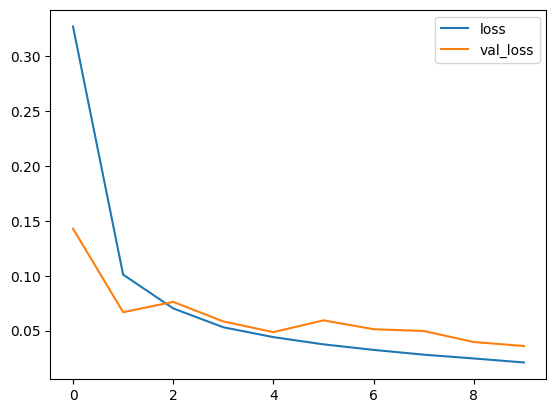

In [12]:
# PLOT LOSS PER ITERATION
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

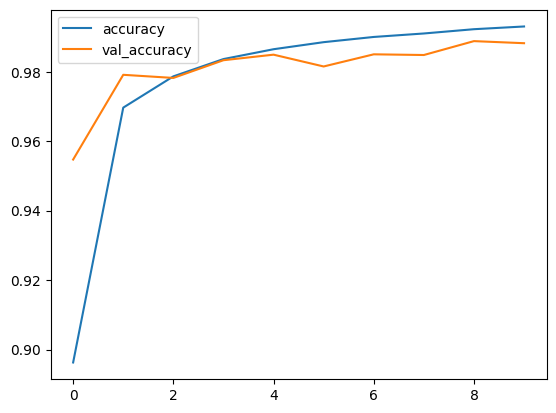

In [13]:
# PLOT ACCURACY PER ITERATION
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
Confusion Matrix, without normalization
[[ 973    0    0    0    0    0    4    1    2    0]
 [   0 1129    0    0    0    1    2    2    1    0]
 [   2    0 1018    3    1    0    0    5    2    1]
 [   0    0    4  998    0    3    0    0    3    2]
 [   0    0    0    0  970    0    2    2    1    7]
 [   2    0    1    3    0  876    2    2    0    6]
 [   1    2    0    0    1    1  953    0    0    0]
 [   1    4    6    4    0    0    0 1006    3    4]
 [   1    0    1    1    0    3    1    2  959    6]
 [   0    0    0    0    7    0    0    2    0 1000]]


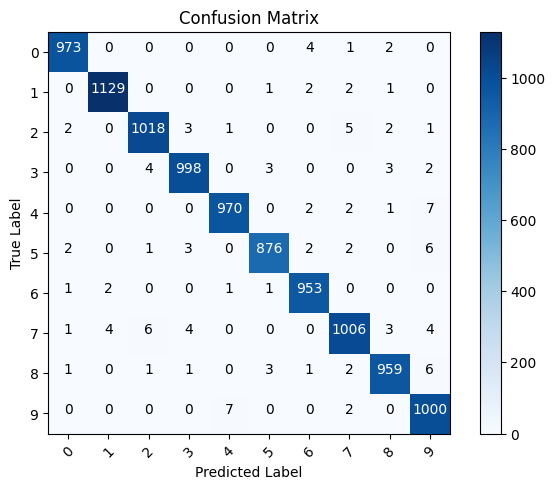

In [16]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

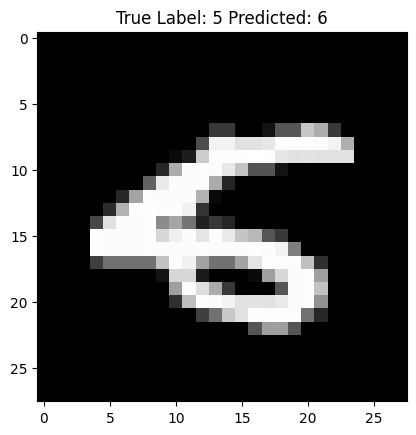

In [17]:
# MISCLASSIFIED EXAMPLES
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True Label: %s Predicted: %s' % (y_test[i], p_test[i]));